In [49]:
!pip install pandas nltk matplotlib seaborn wordcloud scikit-learn langchain_community pypdf

In [50]:
import os
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from langchain_community.document_loaders import PyPDFDirectoryLoader
from collections import defaultdict

In [58]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/mgcon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [60]:
pdf_path = 'data/polizas'

#NLTK setup
try:
    stopwords.words('spanish')
    word_tokenize('Prueba de tokenización', language='spanish')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')

stop_words = set(stopwords.words('spanish'))

In [8]:
#Load PDF files
loader = PyPDFDirectoryLoader(pdf_path)
docs = loader.load()
pdf_data = []
for i, doc in enumerate(docs):
    pdf_data.append({
        'filename': doc.metadata.get('source', f'doc_{i}.pdf'),
        'text': doc.page_content
    })
df_polizas = pd.DataFrame(pdf_data)

print(df_polizas.shape)

(267, 2)


In [26]:
print(f"N° of rows (one for each page): {len(docs)}")

file_content = defaultdict(str)
file_metadata = {} 
page_counts_per_file = defaultdict(int)
for doc_page in docs:
    file_name = doc_page.metadata.get('source', 'desconocido.pdf')
    
    file_content[file_name] += doc_page.page_content + "\n" 
    
    page_counts_per_file[file_name] += 1
   
    if file_name not in file_metadata:
        file_metadata[file_name] = doc_page.metadata

pdf_agg = []
for file_name, text in file_content.items():
    pdf_agg.append({
        'filename': file_name,
        'text': text.strip(),
        'page_count': page_counts_per_file[file_name] 
    })

df_polizas = pd.DataFrame(pdf_agg)
print(f'N° of rows (one for each file): {len(df_polizas)}')



N° of rows (one for each page): 267
N° of rows (one for each file): 9


In [45]:
df_polizas['char_count'] = df_polizas['text'].apply(len)
df_polizas['word_count'] = df_polizas['text'].apply(lambda x: len(x.split()))
print(df_polizas[['filename','char_count', 'word_count', 'page_count']])


                        filename  char_count  word_count  page_count
0  data/polizas/POL120190177.pdf       59344        9143          14
1  data/polizas/POL320200214.pdf       79315       11894          42
2  data/polizas/POL320130223.pdf       52906        7877          47
3  data/polizas/POL320180100.pdf       58433        8957          25
4  data/polizas/POL320150503.pdf       63145        9603          26
5  data/polizas/POL320190074.pdf      106071       15813          72
6  data/polizas/POL320200071.pdf       85623       13157          25
7  data/polizas/POL320210063.pdf       16380        2555           6
8  data/polizas/POL320210210.pdf       25674        3816          10


In [55]:
def clean_text(text, stopwrds):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text.lower(), language='spanish')  # Tokenize and lowercase
    tokens = [word for word in tokens if word not in stopwrds]  # Remove stopwords
    return ' '.join(tokens)

In [53]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mgcon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
if 'text' in df_polizas.columns:
    df_polizas['cleaned_text'] = df_polizas['text'].apply(lambda x: clean_text(x, stop_words))
    print(f"Original (300 chars):\n{df_polizas['text'].iloc[0][:300]}")
    print(f"\nCleaned (300 chars):\n{df_polizas['cleaned_text'].iloc[0][:300]}")

Original (primeros 300 chars):
PÓLIZA DE ACCIDENTES PERSONALES / REEMBOLSO GASTOS MÉDICOS
Incorporada al Depósito de Pólizas bajo el código POL120190177
ARTÍCULO 1°: REGLAS APLICABLES AL CONTRATO
Se aplicarán al presente contrato de seguro las disposiciones contenidas en los artículos siguientes y las
normas legales de carácter i

Limpiado (primeros 300 chars):
póliza accidentes personales reembolso gastos médicos incorporada depósito pólizas bajo código pol120190177 artículo 1 reglas aplicables contrato aplicarán presente contrato seguro disposiciones contenidas artículos siguientes normas legales carácter imperativo establecidas título viii libro ii códi


In [62]:
text_corpus =  " ".join(df_polizas['cleaned_text'].astype(str).tolist())
word_freq = Counter(text_corpus.split())
most_common_words = word_freq.most_common(20)
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most common words:
asegurado: 1129
póliza: 886
condiciones: 687
gastos: 505
particulares: 497
compañía: 425
artículo: 363
pago: 303
seguro: 300
cobertura: 282
médicos: 280
salud: 280
asegurador: 260
cualquier: 250
reembolso: 246
contrato: 233
aseguradora: 231
médico: 220
contratante: 218
fecha: 216


In [63]:
bigrams = list(nltk.bigrams(text_corpus.split()))
bigram_freq = Counter(bigrams)
most_common_bigrams = bigram_freq.most_common(20)
print("\nMost common bigrams:")
for bigram, freq in most_common_bigrams:
    print(f"{bigram}: {freq}")


Most common bigrams:
('condiciones', 'particulares'): 479
('particulares', 'póliza'): 363
('compañía', 'aseguradora'): 215
('asegurado', 'titular'): 180
('gastos', 'médicos'): 175
('contrato', 'seguro'): 125
('condiciones', 'generales'): 101
('compañía', 'seguros'): 93
('salud', 'previsional'): 82
('sistema', 'salud'): 72
('reembolso', 'pago'): 68
('titular', 'contratante'): 62
('pago', 'prima'): 57
('gastos', 'reembolsables'): 53
('porcentajes', 'límites'): 52
('código', 'comercio'): 48
('correo', 'electrónico'): 48
('médico', 'tratante'): 46
('efectivamente', 'incurridos'): 43
('lesión', 'enfermedad'): 43


In [64]:
trigrams = list(nltk.ngrams(text_corpus.split(), 3))
trigram_freq = Counter(trigrams)
most_common_trigrams = trigram_freq.most_common(20)
print("\nMost common trigrams:")
for trigram, freq in most_common_trigrams:
    print(f"{trigram}: {freq}")


Most common trigrams:
('condiciones', 'particulares', 'póliza'): 362
('sistema', 'salud', 'previsional'): 69
('asegurado', 'titular', 'contratante'): 61
('porcentajes', 'límites', 'reembolso'): 37
('límites', 'reembolso', 'pago'): 37
('gastos', 'médicos', 'razonables'): 36
('médicos', 'razonables', 'acostumbrados'): 36
('gastos', 'médicos', 'incurridos'): 35
('salud', 'previsional', 'privado'): 31
('previsional', 'privado', 'estatal'): 29
('treinta', '30', 'días'): 29
('cuadro', 'coberturas', 'condiciones'): 28
('cuadro', 'beneficios', 'condiciones'): 28
('beneficios', 'condiciones', 'particulares'): 28
('coberturas', 'condiciones', 'particulares'): 27
('asegurado', 'afiliado', 'sistema'): 26
('afiliado', 'sistema', 'salud'): 26
('gastos', 'efectivamente', 'incurridos'): 26
('monto', 'máximo', 'gastos'): 25
('máximo', 'gastos', 'reembolsables'): 25


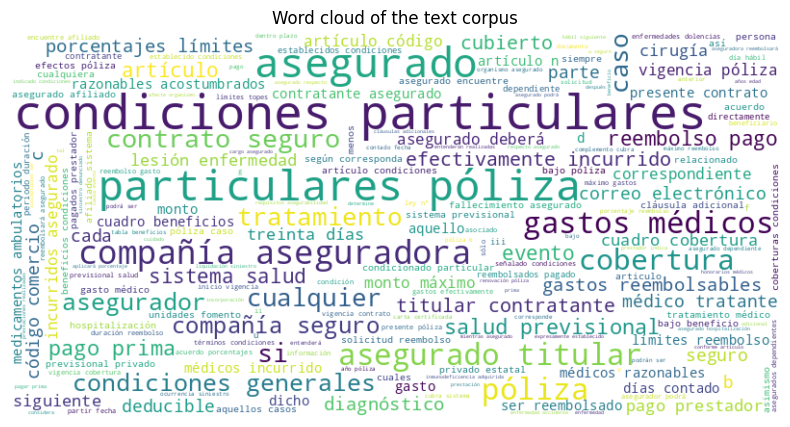

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of the text corpus')
plt.show()